In [1]:
import pandas as pd
import ast
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math

# Import dataset
- dataset can be found on Kaggle. Reference and définitions can be sourced directly from Seattle governmental agency website
- Kaggle: https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking?select=socrata_metadata_2016-building-energy-benchmarking.json
- Seattle.gov: http://www.seattle.gov/environment/climate-change/buildings-and-energy/energy-benchmarking
- Definitions: http://www.seattle.gov/energybenchmarkingmap/#seattle/2016?layer=total_kbtu&sort=total_kbtu&order=desc&lat=47.61160&lng=-122.33002&zoom=14

In [2]:
data2015 = pd.read_csv('2015-building-energy-benchmarking.csv', sep=',',index_col=0)
data2016 = pd.read_csv('2016-building-energy-benchmarking.csv', sep=',',index_col=0)

# Explore dataset
- The data come with 2 files which do not have the same framework and must be harmonized
    - 2015 data
    - 2016 data
- Significant cleaning is also required as well as elimination of redundant or useless information

In [3]:
data2015.head()

DataYear    BuildingType PrimaryPropertyType  \
OSEBuildingID                                                 
1                  2015  NonResidential               Hotel   
2                  2015  NonResidential               Hotel   
3                  2015  NonResidential               Hotel   
5                  2015  NonResidential               Hotel   
8                  2015  NonResidential               Hotel   

                        PropertyName TaxParcelIdentificationNumber  \
OSEBuildingID                                                        
1               MAYFLOWER PARK HOTEL                     659000030   
2                    PARAMOUNT HOTEL                     659000220   
3                       WESTIN HOTEL                     659000475   
5                          HOTEL MAX                     659000640   
8              WARWICK SEATTLE HOTEL                     659000970   

                                                        Location  \
OSEBuildingID                                                      
1              {'latitude': '47.61219025', 'longitude': '-122...   
2              {'latitude': '47.61310583', 'longitude': '-122...   
3              {'latitude': '47.61334897', 'longitude': '-122...   
5              {'latitude': '47.61421585', 'longitude': '-122...   
8              {'latitude': '47.6137544', 'longitude': '-122....   

               CouncilDistrictCode Neighborhood  YearBuilt  NumberofBuildings  \
OSEBuildingID                                                                   
1                                7     DOWNTOWN       1927                  1   
2                                7     DOWNTOWN       1996                  1   
3                                7     DOWNTOWN       1969                  1   
5                                7     DOWNTOWN       1926                  1   
8                                7     DOWNTOWN       1980                  1   

               ...  GHGEmissionsIntensity(kgCO2e/ft2)  DefaultData  Comment  \
OSEBuildingID  ...                                                            
1              ...                               2.64           No      NaN   
2              ...                               2.38           No      NaN   
3              ...                               1.92          Yes      NaN   
5              ...                              31.38           No      NaN   
8              ...                               4.02           No      NaN   

               ComplianceStatus       Outlier 2010 Census Tracts  \
OSEBuildingID                                                      
1                     Compliant           NaN                NaN   
2                     Compliant           NaN                NaN   
3                     Compliant           NaN                NaN   
5                     Compliant  High Outlier                NaN   
8                     Compliant           NaN                NaN   

               Seattle Police Department Micro Community Policing Plan Areas  \
OSEBuildingID                                                                  
1                                                           14.0               
2                                                           14.0               
3                                                           56.0               
5                                                           56.0               
8                                                           56.0               

              City Council Districts  SPD Beats Zip Codes  
OSEBuildingID                                              
1                                NaN       31.0     18081  
2                                NaN       31.0     18081  
3                                NaN       31.0     18081  
5                                NaN       31.0     18081  
8                                NaN       31.0     19576  

[5 rows x 46 columns]

In [4]:
data2016.head()

DataYear    BuildingType PrimaryPropertyType  \
OSEBuildingID                                                 
1                  2016  NonResidential               Hotel   
2                  2016  NonResidential               Hotel   
3                  2016  NonResidential               Hotel   
5                  2016  NonResidential               Hotel   
8                  2016  NonResidential               Hotel   

                              PropertyName          Address     City State  \
OSEBuildingID                                                                
1                     Mayflower park hotel    405 Olive way  Seattle    WA   
2                          Paramount Hotel  724 Pine street  Seattle    WA   
3                  5673-The Westin Seattle  1900 5th Avenue  Seattle    WA   
5                                HOTEL MAX   620 STEWART ST  Seattle    WA   
8              WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA   

               ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
OSEBuildingID                                                               
1              98101.0                    0659000030                    7   
2              98101.0                    0659000220                    7   
3              98101.0                    0659000475                    7   
5              98101.0                    0659000640                    7   
8              98121.0                    0659000970                    7   

               ... Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
OSEBuildingID  ...                                                           
1              ...     1.156514e+06          3946027.0         12764.52930   
2              ...     9.504252e+05          3242851.0         51450.81641   
3              ...     1.451544e+07         49526664.0         14938.00000   
5              ...     8.115253e+05          2768924.0         18112.13086   
8              ...     1.573449e+06          5368607.0         88039.98438   

               NaturalGas(kBtu)  DefaultData  Comments  ComplianceStatus  \
OSEBuildingID                                                              
1                     1276453.0        False       NaN         Compliant   
2                     5145082.0        False       NaN         Compliant   
3                     1493800.0        False       NaN         Compliant   
5                     1811213.0        False       NaN         Compliant   
8                     8803998.0        False       NaN         Compliant   

               Outlier  TotalGHGEmissions GHGEmissionsIntensity  
OSEBuildingID                                                    
1                  NaN             249.98                  2.83  
2                  NaN             295.86                  2.86  
3                  NaN            2089.28                  2.19  
5                  NaN             286.43                  4.67  
8                  NaN             505.01                  2.88  

[5 rows x 45 columns]

In [5]:
print(f'the dataset has {len(data2015)} samples for the year 2015 and {len(data2016)} samples for the year 2016.')

the dataset has 3340 samples for the year 2015 and 3376 samples for the year 2016.


# Harmonize datasets

### The 2015 data is not aligned with 2016. Need to populate missing columns in one file vs the other. Let's re-arrange 2015

In [6]:
# 2015 missing in 2016
set(data2015) - set(data2016)

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [7]:
# 2016 missing in 2015
set(data2016) - set(data2015)

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

In [8]:
ast.literal_eval(data2015['Location'][1])

{'latitude': '47.61219025',
 'longitude': '-122.33799744',
 'human_address': '{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}'}

In [9]:
data2015['Location'][1]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [10]:
data2015['Latitude']=data2015['Location'].apply(lambda l : ast.literal_eval(l)['latitude'])
data2015['Longitude']=data2015['Location'].apply(lambda l : ast.literal_eval(l)['longitude'])
data2015['State']=data2015['Location'].apply(lambda l :  ast.literal_eval(ast.literal_eval(l)['human_address'])['state'])
data2015['ZipCode']=data2015['Location'].apply(lambda l :  ast.literal_eval(ast.literal_eval(l)['human_address'])['zip'])
data2015['City']=data2015['Location'].apply(lambda l :  ast.literal_eval(ast.literal_eval(l)['human_address'])['city'])
data2015['Address']=data2015['Location'].apply(lambda l :  ast.literal_eval(ast.literal_eval(l)['human_address'])['address'])

In [11]:
data2015['TotalGHGEmissions']=data2015['GHGEmissions(MetricTonsCO2e)']
data2015['GHGEmissionsIntensity']=data2015['GHGEmissionsIntensity(kgCO2e/ft2)']

In [12]:
# 2015 and 2016 now aligned and ready to be combined
set(data2015) - set(data2016)
set(data2016) - set(data2015)

{'Comments'}

### Drop redundant columns and useless information
- redundant: 'Location', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Zip Codes'
- not relevant: 
    - 'SPD Beats', (Police information)
    - 'Seattle Police Department Micro Community Policing Plan Areas', (Police information)
    - 'OtherFuelUse(kBtu)', (largely incomplete)
    - '2010 Census Tracts',
    - 'City Council Districts',
    - 'Comment' (misc text info largely incomplete)

In [13]:
data2015.drop(['Location','GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)', 'SPD Beats','Seattle Police Department Micro Community Policing Plan Areas',
               'Zip Codes','OtherFuelUse(kBtu)','2010 Census Tracts','City Council Districts', 'Comment'], axis='columns', inplace=True)

In [14]:
data2016.drop(['Comments'], axis='columns', inplace=True)

### Align data types between the 2 files

In [15]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)
pd.DataFrame([data2015.dtypes,data2016.dtypes])

DataYear BuildingType PrimaryPropertyType PropertyName  \
0    int64       object              object       object   
1    int64       object              object       object   

  TaxParcelIdentificationNumber CouncilDistrictCode Neighborhood YearBuilt  \
0                        object               int64       object     int64   
1                        object               int64       object     int64   

  NumberofBuildings NumberofFloors PropertyGFATotal PropertyGFAParking  \
0             int64        float64            int64              int64   
1           float64          int64            int64              int64   

  PropertyGFABuilding(s) ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                  int64                    object                 object   
1                  int64                    object                 object   

  LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                   float64                       object   
1                   float64                       object   

  SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                         float64                      object   
1                         float64                      object   

  ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified ENERGYSTARScore  \
0                        float64                   object         float64   
1                        float64                   object         float64   

  SiteEUI(kBtu/sf) SiteEUIWN(kBtu/sf) SourceEUI(kBtu/sf) SourceEUIWN(kBtu/sf)  \
0          float64            float64            float64              float64   
1          float64            float64            float64              float64   

  SiteEnergyUse(kBtu) SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh)  \
0             float64               float64        float64          float64   
1             float64               float64        float64          float64   

  Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu) DefaultData  \
0           float64            float64          float64      object   
1           float64            float64          float64        bool   

  ComplianceStatus Outlier Latitude Longitude   State  ZipCode    City  \
0           object  object   object    object  object   object  object   
1           object  object  float64   float64  object  float64  object   

  Address TotalGHGEmissions GHGEmissionsIntensity  
0  object           float64               float64  
1  object           float64               float64

In [16]:
data2015[['Latitude','Longitude','ZipCode']]=data2015[['Latitude','Longitude','ZipCode']].astype('float64')

In [17]:
data2015['DefaultData'] = data2015['DefaultData'].map({'Yes' : True, 'No' : False}).head()

### Combine the 2 datasets

In [18]:
data=pd.concat([data2015,data2016],axis=0,ignore_index=True)

In [19]:
print(f'the total dataset has a total number of samples of {len(data)}')

the total dataset has a total number of samples of 6716


### Harmonize values

In [20]:
for key in list(data.keys()):
    if data[key].nunique()<20:
        print(key,'------->', data[key].unique())
    else:
        print(key, '------->',data[key].nunique())

DataYear -------> [2015 2016]
BuildingType -------> ['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)' 'Nonresidential WA']
PrimaryPropertyType -------> 32
PropertyName -------> 6527
TaxParcelIdentificationNumber -------> 3729
CouncilDistrictCode -------> [7 3 2 4 5 6 1]
Neighborhood -------> ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Central' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']
YearBuilt -------> 113
NumberofBuildings -------> [  1.   7.  11.  16.   4.   3.  39.   2.  10.   6.   0.  27.  14.   9.
   5.  nan   8.  23. 111.]
NumberofFloors -------> 50
PropertyGFATotal -------> 3297
PropertyGFAParking -------> 960
PropertyGFABuilding(s) -------> 3726
ListOfAllPropertyUseTypes -------> 488
LargestPropertyUseType -------> 57
LargestPropertyUseTypeGFA -

In [21]:
data['Neighborhood'].replace('Delridge', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE', inplace=True)
data['Neighborhood'].replace('North', 'NORTH', inplace=True)
data['Neighborhood'].replace('Northwest', 'NORTHWEST', inplace=True)
data['Neighborhood'].replace('Central', 'CENTRAL', inplace=True)
data['Neighborhood'].replace('Ballard', 'BALLARD', inplace=True)

In [22]:
data['City'].replace('Seattle', 'SEATTLE', inplace=True)
data['ComplianceStatus'].replace('Not Compliant', 'Non-Compliant', inplace=True)
data['ComplianceStatus'].replace('Error - Correct Default Data', 'Missing Data', inplace=True)
data['NumberofBuildings'].replace(0, 1, inplace=True)

### Check that geolocalization data refer to the city of Seattle

In [23]:
# https://python-visualization.github.io/folium/quickstart.html#Getting-Started
import folium
m = folium.Map()
m = folium.Map(location=[data2015['Latitude'].mean(), data2015['Longitude'].mean()], zoom_start=11)
for i in range(0,len(data2015)):
    folium.Circle([data2015.iloc[i]['Latitude'],data2015.iloc[i]['Longitude']], popup=data2015.iloc[i]['Address'], radius =100).add_to(m)
m
#m.save('index.html')

### Analyze missing data (N/A)
- there are a number of columns with missing data
- We must define out strategy to deal with these
    - largest gaps can be observed with the output below

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6716 non-null   int64  
 1   BuildingType                     6716 non-null   object 
 2   PrimaryPropertyType              6716 non-null   object 
 3   PropertyName                     6716 non-null   object 
 4   TaxParcelIdentificationNumber    6714 non-null   object 
 5   CouncilDistrictCode              6716 non-null   int64  
 6   Neighborhood                     6716 non-null   object 
 7   YearBuilt                        6716 non-null   int64  
 8   NumberofBuildings                6708 non-null   float64
 9   NumberofFloors                   6708 non-null   float64
 10  PropertyGFATotal                 6716 non-null   int64  
 11  PropertyGFAParking               6716 non-null   int64  
 12  PropertyGFABuilding(

- Let's populate some of the missiong information with a simple strategy

In [25]:
data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']] = data[['ThirdLargestPropertyUseType', 'SecondLargestPropertyUseType']].fillna('No Use')
data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']] = data[['ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA']].fillna(0, )
data['LargestPropertyUseType'] = data['LargestPropertyUseType'].fillna('No information')

In [26]:
data['Outlier'].replace(np.nan,'normal',inplace=True)

In [27]:
data.describe()

DataYear  CouncilDistrictCode    YearBuilt  NumberofBuildings  \
count  6716.00000          6716.000000  6716.000000        6708.000000   
mean   2015.50268             4.445057  1968.101549           1.085122   
std       0.50003             2.123749    33.020391           1.588519   
min    2015.00000             1.000000  1900.000000           1.000000   
25%    2015.00000             3.000000  1948.000000           1.000000   
50%    2016.00000             4.000000  1974.000000           1.000000   
75%    2016.00000             7.000000  1996.000000           1.000000   
max    2016.00000             7.000000  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     6708.000000      6.716000e+03         6716.000000   
mean         4.695736      9.281410e+04         9519.597975   
std          5.476218      1.875062e+05        33868.050881   
min          0.000000      1.128500e+04           -3.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.400800e+04            0.000000   
75%          5.000000      8.943125e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            6.716000e+03               6.560000e+03   
mean             8.329450e+04               7.707936e+04   
std              1.733470e+05               1.681617e+05   
min             -5.055000e+04               5.656000e+03   
25%              2.727300e+04               2.501600e+04   
50%              4.218500e+04               3.953000e+04   
75%              8.112000e+04               7.417800e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      6716.000000                     6716.000000   
mean                      13535.428275                     1938.571679   
std                       39689.257069                    11702.088239   
min                           0.000000                        0.000000   
25%                           0.000000                        0.000000   
50%                           0.000000                        0.000000   
75%                       10206.000000                        0.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      5093.000000       6699.000000         6700.000000   
mean         67.906342         54.182341           57.308522   
std          27.012124         55.101657           56.390651   
min           1.000000          0.000000            0.000000   
25%          52.000000         27.600000           29.600000   
50%          75.000000         38.000000           40.900000   
75%          90.000000         60.200000           64.925001   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         6697.000000           6697.000000         6.701000e+03   
mean           133.510303            138.356802         5.194673e+06   
std            135.677195            135.302508         1.813648e+07   
min             -2.000000             -2.100000         0.000000e+00   
25%             74.000000             79.199997         9.200689e+05   
50%             95.600000            102.099998         1.791071e+06   
75%            143.900000            149.800000         4.135280e+06   
max           2620.000000           2620.000000         8.739237e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           6.700000e+03    6.697000e+03      6.697000e+03   
mean            5.240110e+06    2.625076e+05      1.052458e+06   
std             1.500896e+07    3.704221e+06      3.659769e+06   
min             0.000000e+00    0.000000e+00     -3.382680e+04   
25%       

#### Drop buildings posting no energy consumption
    - site Energy use = 0 as per above

In [28]:
index_to_drop = data[data['SiteEnergyUseWN(kBtu)']<1].index
print(index_to_drop)
print(f'there are {len(index_to_drop)} samples with 0 energy consumption reported -> Drop')

Int64Index([  44,  207,  451,  492,  572,  578,  614,  894,  966, 1118, 2152,
            2818, 3368, 3371, 3402, 3421, 3425, 3435, 3473, 3479, 3492, 3560,
            3587, 3624, 3644, 3690, 3954, 3970, 4086, 4100, 4222, 4293, 4701,
            4889, 5234, 6506, 6614, 6615, 6617, 6642, 6663],
           dtype='int64')
there are 41 samples with 0 energy consumption reported -> Drop


In [29]:
data.drop(index_to_drop, inplace=True, axis=0)

#### Check if full rows of N/A (to drop)
- none detected and dropped

In [30]:
print('# samples before:',len(data))
data.dropna(how = 'all', axis=0, inplace=True)
print('# samples after:',len(data))

# samples before: 6675
# samples after: 6675


### With this first cleaning step done to fill missing values, let's dive into the numeric data

In [31]:
numeric_data = data.drop(['ENERGYSTARScore'], axis=1).select_dtypes(['int32', 'float64']).copy()
numeric_data.shape

(6675, 21)

In [32]:
numeric_data.isna().sum()

NumberofBuildings                    8
NumberofFloors                       8
LargestPropertyUseTypeGFA          155
SecondLargestPropertyUseTypeGFA      0
ThirdLargestPropertyUseTypeGFA       0
SiteEUI(kBtu/sf)                    15
SiteEUIWN(kBtu/sf)                  16
SourceEUI(kBtu/sf)                  19
SourceEUIWN(kBtu/sf)                19
SiteEnergyUse(kBtu)                 15
SiteEnergyUseWN(kBtu)               16
SteamUse(kBtu)                      19
Electricity(kWh)                    19
Electricity(kBtu)                   19
NaturalGas(therms)                  19
NaturalGas(kBtu)                    19
Latitude                             0
Longitude                            0
ZipCode                             16
TotalGHGEmissions                   19
GHGEmissionsIntensity               19
dtype: int64

### A number of these values will not be relevant for our prediction modelization
- We will retain only NRJ consumption and Emission in absolute value. We will retain:
    - SiteEnergyUseWN(kBtu)  (consumption normalized for Weather, ie Weather Normalized)
    - TotalGHGEmissions
- The other columns will be discarded as they are correlated to our targets. Missing values therefore not important in these columns
- ZipCode redundant with geolocalization Latitude & Longitude which are complete

#### Drop columns linked to the targets

In [33]:
columns_to_drop = ['SiteEUI(kBtu/sf)',
                    'SiteEUIWN(kBtu/sf)',
                    'SourceEUI(kBtu/sf)',
                    'SourceEUIWN(kBtu/sf)',
                    'SiteEnergyUse(kBtu)',
                    'SteamUse(kBtu)',
                    'Electricity(kWh)',
                    'Electricity(kBtu)',
                    'NaturalGas(therms)',
                    'NaturalGas(kBtu)',
                    'OtherFuelUse(kBtu)',
                    'GHGEmissionsIntensity'
                   ]

In [34]:
for column in columns_to_drop:
    try:
        data.drop(column,axis='columns',inplace=True)
    except:
        print(f'column {column} not present')

column OtherFuelUse(kBtu) not present


#### Let's focus on property details
- populate missing building statistics
- populate missing floors statistics

In [35]:
numeric_data.NumberofBuildings.isna().sum()

8

In [36]:
numeric_data.NumberofBuildings.value_counts()

1.0     6549
2.0       41
3.0       25
4.0       13
5.0       10
6.0        8
7.0        4
8.0        3
10.0       3
9.0        2
14.0       2
16.0       2
11.0       2
39.0       1
23.0       1
27.0       1
Name: NumberofBuildings, dtype: int64

In [37]:
# Fill with most representative value
data.NumberofBuildings.replace(np.nan,1,inplace=True)

In [38]:
numeric_data.NumberofFloors.value_counts()

4.0     1390
3.0     1387
1.0      910
2.0      873
6.0      602
5.0      581
7.0      281
8.0      124
11.0      64
10.0      62
13.0      41
12.0      39
9.0       36
14.0      25
0.0       20
17.0      17
15.0      14
24.0      14
16.0      14
18.0      14
23.0      13
19.0      12
26.0      12
33.0      11
42.0      10
21.0      10
25.0      10
27.0       9
22.0       8
20.0       8
29.0       6
41.0       4
28.0       4
37.0       4
31.0       4
36.0       4
34.0       4
55.0       2
30.0       2
49.0       2
32.0       2
40.0       2
63.0       2
99.0       2
39.0       2
46.0       2
76.0       2
38.0       2
47.0       2
56.0       2
Name: NumberofFloors, dtype: int64

In [39]:
data[data.NumberofFloors.isna()]

DataYear        BuildingType         PrimaryPropertyType  \
2015      2015              Campus                       Other   
3171      2015      NonResidential  Non-Refrigerated Warehouse   
3172      2015      NonResidential              Medical Office   
3173      2015      NonResidential              Medical Office   
3193      2015  Nonresidential COS                       Other   
3209      2015  Nonresidential COS                       Other   
3311      2015  Nonresidential COS                       Other   
3313      2015      NonResidential                       Other   

                                                PropertyName  \
2015  KING COUNTY METRO TRANSIT ATLANTIC-CENTRAL BASE-CAMPUS   
3171                         SAND POINT BUILDING 5A,5B,5C,5D   
3172                                  SAND POINT BUILDING 25   
3173                                  SAND POINT BUILDING 29   
3193                                  GEORGETOWN STEAM PLANT   
3209                                    MAGNUSON PARK CAMPUS   
3311                       FIRST HILL STREET CAR MAINTENANCE   
3313                  SMILOW RAINIER VISTA BOYS & GIRLS CLUB   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
2015                    7666203387                    2  GREATER DUWAMISH   
3171                     225049077                    4         NORTHEAST   
3172                     225049077                    4         NORTHEAST   
3173                     225049077                    4         NORTHEAST   
3193                           NaN                    2  GREATER DUWAMISH   
3209                     225049062                    4         NORTHEAST   
3311                    8592900285                    2  GREATER DUWAMISH   
3313                    6056110050                    2         SOUTHEAST   

      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
2015       1991               10.0             NaN            180796   
3171       1940                1.0             NaN            384772   
3172       1960                1.0             NaN             30287   
3173       1960                1.0             NaN             21931   
3193       1906                1.0             NaN             39212   
3209       1929                7.0             NaN            502030   
3311       2014                1.0             NaN             20993   
3313       2009                1.0             NaN             40265   

      PropertyGFAParking  PropertyGFABuilding(s)  \
2015                   0                  180796   
3171                   0                  384772   
3172                   0                   30287   
3173                   0                   21931   
3193                   0                   39212   
3209                   0                  502030   
3311                   0                   20993   
3313                   0                   40265   

                            ListOfAllPropertyUseTypes  \
2015                                   Other, Parking   
3171               Non-Refrigerated Warehouse, Office   
3172                                   Medical Office   
3173                                   Medical Office   
3193                                            Other   
3209                               Other - Recreation   
3311  Repair Services (Vehicle, Shoe, Locksmith, etc)   
3313                               Pre-school/Daycare   

                               LargestPropertyUseType  \
2015                                            Other   
3171                       Non-Refrigerated Warehouse   
3172                                   Medical Office   
3173                                   Medical Office   
3193                                            Other   
3209                               Other - Recreation   
3311  Repair Services (Vehicle, Shoe, Locksmith, etc)   
3313                               Pre-school/Daycar

In [40]:
# Fill with most representative value
data.NumberofFloors.replace(np.nan,3,inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6675 entries, 0 to 6715
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6675 non-null   int64  
 1   BuildingType                     6675 non-null   object 
 2   PrimaryPropertyType              6675 non-null   object 
 3   PropertyName                     6675 non-null   object 
 4   TaxParcelIdentificationNumber    6673 non-null   object 
 5   CouncilDistrictCode              6675 non-null   int64  
 6   Neighborhood                     6675 non-null   object 
 7   YearBuilt                        6675 non-null   int64  
 8   NumberofBuildings                6675 non-null   float64
 9   NumberofFloors                   6675 non-null   float64
 10  PropertyGFATotal                 6675 non-null   int64  
 11  PropertyGFAParking               6675 non-null   int64  
 12  PropertyGFABuilding(

# Further dropping columns
- Not usable: 'YearsENERGYSTARCertified', 'ListOfAllPropertyUseTypes' (used in other columns), 'PropertyName'
- 'TaxParcelIdentificationNumber' (both redundant with BuildingID)
- Columns with single values: 'State', 'City'
- 'DefaultData': unknown information
- ZipCode, Address : redundant with latitude and Longitude

In [42]:
data.drop(['YearsENERGYSTARCertified','PropertyName','TaxParcelIdentificationNumber'], axis='columns',inplace=True)

In [43]:
data.drop(['DefaultData','ListOfAllPropertyUseTypes'],axis='columns',inplace=True)

In [44]:
data.drop(['State', 'City'], axis='columns',inplace=True)

In [45]:
data.drop(['ZipCode', 'Address'], axis='columns',inplace=True)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6675 entries, 0 to 6715
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         6675 non-null   int64  
 1   BuildingType                     6675 non-null   object 
 2   PrimaryPropertyType              6675 non-null   object 
 3   CouncilDistrictCode              6675 non-null   int64  
 4   Neighborhood                     6675 non-null   object 
 5   YearBuilt                        6675 non-null   int64  
 6   NumberofBuildings                6675 non-null   float64
 7   NumberofFloors                   6675 non-null   float64
 8   PropertyGFATotal                 6675 non-null   int64  
 9   PropertyGFAParking               6675 non-null   int64  
 10  PropertyGFABuilding(s)           6675 non-null   int64  
 11  LargestPropertyUseType           6675 non-null   object 
 12  LargestPropertyUseTy

### Fill in missing 'LargestPropertyUseTypeGFA' values 

In [47]:
data[data['LargestPropertyUseTypeGFA'].isna()]

DataYear          BuildingType          PrimaryPropertyType  \
10        2015        NonResidential                        Hotel   
14        2015        NonResidential                        Hotel   
19        2015        NonResidential                        Hotel   
35        2015        NonResidential          Distribution Center   
52        2015        NonResidential                        Hotel   
160       2015     SPS-District K-12            SPS-District K-12   
194       2015        NonResidential                        Hotel   
201       2015        NonResidential                 Large Office   
204       2015        NonResidential                 Retail Store   
233       2015        NonResidential                 Large Office   
241       2015        NonResidential  Small- and Mid-Sized Office   
251       2015        NonResidential                 Large Office   
263       2015        NonResidential                 Retail Store   
285       2015        NonResidential                 Large Office   
309       2015        NonResidential           Mixed Use Property   
320       2015        NonResidential  Small- and Mid-Sized Office   
346       2015        NonResidential                   Laboratory   
347       2015        NonResidential           Mixed Use Property   
355       2015        NonResidential        Self-Storage Facility   
364       2015        NonResidential  Small- and Mid-Sized Office   
374       2015        NonResidential                 Large Office   
379       2015        NonResidential                        Other   
395       2015        NonResidential  Small- and Mid-Sized Office   
406       2015        NonResidential   Non-Refrigerated Warehouse   
465       2015        NonResidential   Non-Refrigerated Warehouse   
539       2015        NonResidential          Distribution Center   
579       2015        NonResidential  Small- and Mid-Sized Office   
586       2015        NonResidential                 Large Office   
593       2015        NonResidential                        Other   
599       2015        NonResidential       Refrigerated Warehouse   
625       2015        NonResidential  Small- and Mid-Sized Office   
649       2015        NonResidential           Mixed Use Property   
651       2015  Multifamily LR (1-4)        Senior Care Community   
713       2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
714       2015  Multifamily HR (10+)        High-Rise Multifamily   
767       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
782       2015        NonResidential                 Retail Store   
808       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
813       2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
818       2015  Multifamily HR (10+)        High-Rise Multifamily   
892       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
901       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1038      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1090      2015  Multifamily HR (10+)        High-Rise Multifamily   
1110      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1135      2015     SPS-District K-12            SPS-District K-12   
1159      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1202      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1263      2015        NonResidential  Small- and Mid-Sized Office   
1266      2015        NonResidential               Medical Office   
1296      2015        NonResidential  Small- and Mid-Sized Office   
1330      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1343      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1346      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1364      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1377      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1380      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1415

In [48]:
for index in range(len(data)):
    if np.isnan(data.iloc[index]['LargestPropertyUseTypeGFA']):
        data['LargestPropertyUseTypeGFA'].iloc[index] = data['PropertyGFABuilding(s)'].iloc[index]

C:\Users\lveys\anaconda3\envs\torch\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [49]:
data['LargestPropertyUseType'].value_counts()

Multifamily Housing                                     3262
Office                                                   966
Non-Refrigerated Warehouse                               393
K-12 School                                              260
Other                                                    205
Retail Store                                             197
No information                                           155
Hotel                                                    145
Worship Facility                                         137
Distribution Center                                      106
Senior Care Community                                     88
Medical Office                                            84
Supermarket/Grocery Store                                 78
Parking                                                   60
Self-Storage Facility                                     55
Other - Recreation                                        51
College/University      

In [50]:
data['SecondLargestPropertyUseType'].value_counts()

No Use                                                  3451
Parking                                                 1845
Office                                                   419
Retail Store                                             310
Other                                                    116
Restaurant                                                83
Non-Refrigerated Warehouse                                67
Multifamily Housing                                       33
Supermarket/Grocery Store                                 28
Fitness Center/Health Club/Gym                            27
Data Center                                               26
Other - Services                                          24
Medical Office                                            23
Swimming Pool                                             18
Other - Entertainment/Public Assembly                     16
Distribution Center                                       14
Laboratory              

In [51]:
data['ThirdLargestPropertyUseType'].value_counts()

No Use                                                  5526
Retail Store                                             217
Office                                                   205
Parking                                                  135
Restaurant                                               109
Other                                                     99
Swimming Pool                                             54
Non-Refrigerated Warehouse                                36
Medical Office                                            33
Data Center                                               24
Social/Meeting Hall                                       22
Multifamily Housing                                       22
Food Service                                              22
Other - Restaurant/Bar                                    17
Bank Branch                                               12
Pre-school/Daycare                                        12
Other - Entertainment/Pu

### Drop the rows with no target values

In [52]:
data.isna().sum().sort_values()

DataYear                              0
Latitude                              0
Outlier                               0
ComplianceStatus                      0
ThirdLargestPropertyUseTypeGFA        0
ThirdLargestPropertyUseType           0
SecondLargestPropertyUseTypeGFA       0
SecondLargestPropertyUseType          0
LargestPropertyUseTypeGFA             0
Longitude                             0
LargestPropertyUseType                0
PropertyGFAParking                    0
PropertyGFATotal                      0
NumberofFloors                        0
NumberofBuildings                     0
YearBuilt                             0
Neighborhood                          0
CouncilDistrictCode                   0
PrimaryPropertyType                   0
BuildingType                          0
PropertyGFABuilding(s)                0
SiteEnergyUseWN(kBtu)                16
TotalGHGEmissions                    19
ENERGYSTARScore                    1601
dtype: int64

In [53]:
index_to_drop = data.drop(['ENERGYSTARScore'], axis=1)[data.drop(['ENERGYSTARScore'],axis=1).isna().any(axis=1)].index

In [54]:
index_to_drop

Int64Index([  62,  719,  767, 1346, 1358, 1360, 1838, 2108, 2381, 2406, 3903,
            3918, 4098, 5108, 5132, 5661, 5814, 5820, 6010, 6688],
           dtype='int64')

In [55]:
data.drop(index_to_drop, axis=0, inplace=True)

In [56]:
data.isna().sum()

DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
CouncilDistrictCode                   0
Neighborhood                          0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                    1582
SiteEnergyUseWN(kBtu)                 0
ComplianceStatus                      0
Outlier                               0
Latitude                              0
Longitude                             0
TotalGHGEmissions                     0
dtype: int64

In [57]:
data

DataYear        BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0         2015      NonResidential               Hotel                    7   
1         2015      NonResidential               Hotel                    7   
2         2015      NonResidential               Hotel                    7   
3         2015      NonResidential               Hotel                    7   
4         2015      NonResidential               Hotel                    7   
...        ...                 ...                 ...                  ...   
6711      2016  Nonresidential COS              Office                    2   
6712      2016  Nonresidential COS               Other                    2   
6713      2016  Nonresidential COS               Other                    7   
6714      2016  Nonresidential COS  Mixed Use Property                    1   
6715      2016  Nonresidential COS  Mixed Use Property                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN       1927                1.0            12.0   
1                  DOWNTOWN       1996                1.0            11.0   
2                  DOWNTOWN       1969                1.0            41.0   
3                  DOWNTOWN       1926                1.0            10.0   
4                  DOWNTOWN       1980                1.0            18.0   
...                     ...        ...                ...             ...   
6711       GREATER DUWAMISH       1990                1.0             1.0   
6712               DOWNTOWN       2004                1.0             1.0   
6713  MAGNOLIA / QUEEN ANNE       1974                1.0             1.0   
6714       GREATER DUWAMISH       1989                1.0             1.0   
6715       GREATER DUWAMISH       1938                1.0             1.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               961990                   0                  961990   
3                61320                   0                   61320   
4               119890               12460                  107430   
...                ...                 ...                     ...   
6711             12294                   0                   12294   
6712             16000                   0                   16000   
6713             13157                   0                   13157   
6714             14101                   0                   14101   
6715             18258                   0                   18258   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   757243.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
6711                 Office                    12294.0   
6712     Other - Recreation                    16000.0   
6713     Other - Recreation                     7583.0   
6714     Other - Recreation                     6601.0   
6715     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                             No Use                              0.0   
1                            Parking                          15064.0   
2                            Parking                         100000.0   
3                             No Use                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
6711                          No Use                              0.0   
6712      

In [58]:
#data.keys()

# Columns for Predictions
- NRJ consumption : 'SiteEnergyUseWN(kBtu)'
- Emissions : 'TotalGHGEmissions'

In [59]:
data

DataYear        BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0         2015      NonResidential               Hotel                    7   
1         2015      NonResidential               Hotel                    7   
2         2015      NonResidential               Hotel                    7   
3         2015      NonResidential               Hotel                    7   
4         2015      NonResidential               Hotel                    7   
...        ...                 ...                 ...                  ...   
6711      2016  Nonresidential COS              Office                    2   
6712      2016  Nonresidential COS               Other                    2   
6713      2016  Nonresidential COS               Other                    7   
6714      2016  Nonresidential COS  Mixed Use Property                    1   
6715      2016  Nonresidential COS  Mixed Use Property                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN       1927                1.0            12.0   
1                  DOWNTOWN       1996                1.0            11.0   
2                  DOWNTOWN       1969                1.0            41.0   
3                  DOWNTOWN       1926                1.0            10.0   
4                  DOWNTOWN       1980                1.0            18.0   
...                     ...        ...                ...             ...   
6711       GREATER DUWAMISH       1990                1.0             1.0   
6712               DOWNTOWN       2004                1.0             1.0   
6713  MAGNOLIA / QUEEN ANNE       1974                1.0             1.0   
6714       GREATER DUWAMISH       1989                1.0             1.0   
6715       GREATER DUWAMISH       1938                1.0             1.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               961990                   0                  961990   
3                61320                   0                   61320   
4               119890               12460                  107430   
...                ...                 ...                     ...   
6711             12294                   0                   12294   
6712             16000                   0                   16000   
6713             13157                   0                   13157   
6714             14101                   0                   14101   
6715             18258                   0                   18258   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   757243.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
6711                 Office                    12294.0   
6712     Other - Recreation                    16000.0   
6713     Other - Recreation                     7583.0   
6714     Other - Recreation                     6601.0   
6715     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                             No Use                              0.0   
1                            Parking                          15064.0   
2                            Parking                         100000.0   
3                             No Use                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
6711                          No Use                              0.0   
6712      

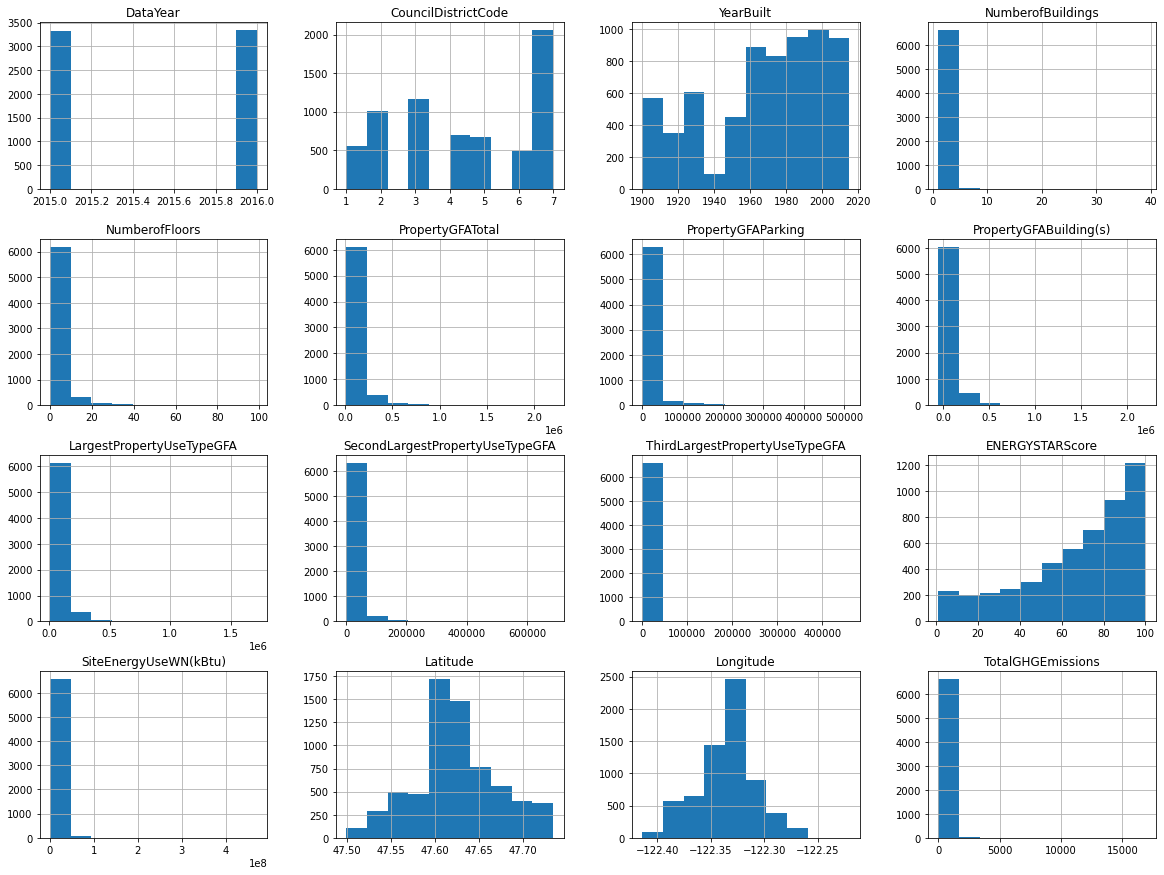

In [60]:
data.hist(figsize=(20,15))
plt.show()

In [61]:
data.corr()

DataYear  CouncilDistrictCode  YearBuilt  \
DataYear                         1.000000            -0.003354   0.012699   
CouncilDistrictCode             -0.003354             1.000000  -0.021212   
YearBuilt                        0.012699            -0.021212   1.000000   
NumberofBuildings                0.038884            -0.024705   0.008120   
NumberofFloors                   0.005057             0.246362   0.143885   
PropertyGFATotal                 0.005993             0.143452   0.182328   
PropertyGFAParking              -0.044492             0.143203   0.216269   
PropertyGFABuilding(s)           0.018419             0.126151   0.151413   
LargestPropertyUseTypeGFA        0.004967             0.114773   0.159410   
SecondLargestPropertyUseTypeGFA  0.016877             0.132869   0.176790   
ThirdLargestPropertyUseTypeGFA   0.017480             0.049789   0.056080   
ENERGYSTARScore                  0.001146             0.062769   0.020897   
SiteEnergyUseWN(kBtu)            0.003522             0.068941   0.075102   
Latitude                        -0.001557             0.490262   0.118648   
Longitude                        0.004658            -0.268015  -0.054530   
TotalGHGEmissions                0.006874             0.028979   0.030325   

                                 NumberofBuildings  NumberofFloors  \
DataYear                                  0.038884        0.005057   
CouncilDistrictCode                      -0.024705        0.246362   
YearBuilt                                 0.008120        0.143885   
NumberofBuildings                         1.000000       -0.026365   
NumberofFloors                           -0.026365        1.000000   
PropertyGFATotal                          0.200527        0.590251   
PropertyGFAParking                        0.012161        0.426419   
PropertyGFABuilding(s)                    0.225323        0.561476   
LargestPropertyUseTypeGFA                 0.223953        0.567565   
SecondLargestPropertyUseTypeGFA           0.092899        0.432581   
ThirdLargestPropertyUseTypeGFA            0.001210        0.211085   
ENERGYSTARScore                          -0.013168        0.016400   
SiteEnergyUseWN(kBtu)                     0.218509        0.314387   
Latitude                                  0.002701       -0.022358   
Longitude                                 0.018843       -0.024253   
TotalGHGEmissions                         0.198367        0.166932   

                                 PropertyGFATotal  PropertyGFAParking  \
DataYear                                 0.005993           -0.044492   
CouncilDistrictCode                      0.143452            0.143203   
YearBuilt                                0.182328            0.216269   
NumberofBuildings                        0.200527            0.012161   
NumberofFloors                           0.590251            0.426419   
PropertyGFATotal                         1.000000            0.616863   
PropertyGFAParking                       0.616863            1.000000   
PropertyGFABuilding(s)                   0.978753            0.442374   
LargestPropertyUseTypeGFA                0.952018            0.520924   
SecondLargestPropertyUseTypeGFA          0.746671            0.506692   
ThirdLargestPropertyUseTypeGFA           0.399562            0.234983   
ENERGYSTARScore                          0.059343            0.062900   
SiteEnergyUseWN(kBtu)                    0.637474            0.277071   
Latitude                                -0.038023            0.006347   
Longitude                                0.021608           -0.007674   
TotalGHGEmissions                        0.473371            0.126174   

                                 PropertyGFABuilding(s)  \
DataYear                                       0.018419   
CouncilDistrictCode                            0.126151   
YearBuilt                                      0.151413   
NumberofBuildings                              0.22532

<AxesSubplot:>

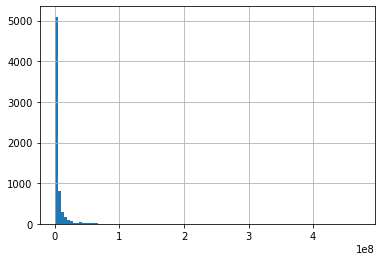

In [62]:
data['SiteEnergyUseWN(kBtu)'].hist(bins=100)

<AxesSubplot:>

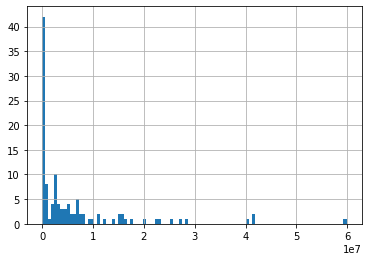

In [63]:
data[data['Outlier']!='normal']['SiteEnergyUseWN(kBtu)'].hist(bins=100)

In [64]:
outliers = data[data['Outlier']!='normal']
outliers

DataYear          BuildingType          PrimaryPropertyType  \
3         2015        NonResidential                        Hotel   
228       2015        NonResidential                 Large Office   
322       2015        NonResidential                 Large Office   
387       2015        NonResidential                 Retail Store   
450       2015        NonResidential                 Large Office   
515       2015        NonResidential                 Large Office   
516       2015        NonResidential                 Retail Store   
519       2015        NonResidential                 Large Office   
520       2015        NonResidential                 Large Office   
646       2015        NonResidential                 Large Office   
659       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
702       2015        NonResidential  Small- and Mid-Sized Office   
726       2015  Multifamily HR (10+)        High-Rise Multifamily   
745       2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
784       2015        NonResidential                 Retail Store   
804       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
828       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
837       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
845       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
878       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
896       2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
975       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
992       2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1152      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1160      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1239      2015        NonResidential  Small- and Mid-Sized Office   
1249      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1283      2015        NonResidential  Small- and Mid-Sized Office   
1294      2015        NonResidential  Small- and Mid-Sized Office   
1327      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1352      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1418      2015        NonResidential  Small- and Mid-Sized Office   
1543      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1577      2015        NonResidential  Small- and Mid-Sized Office   
1611      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1759      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1760      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1761      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1764      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1796      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1864      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
1907      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
1966      2015        NonResidential  Small- and Mid-Sized Office   
1981      2015        NonResidential  Small- and Mid-Sized Office   
2055      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2070      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
2277      2015  Multifamily HR (10+)        High-Rise Multifamily   
2379      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2438      2015        NonResidential                        Hotel   
2460      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
2470      2015        NonResidential  Small- and Mid-Sized Office   
2508      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2536      2015  Multifamily MR (5-9)         Mid-Rise Multifamily   
2627      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2707      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2712      2015        NonResidential  Small- and Mid-Sized Office   
2722      2015  Multifamily LR (1-4)         Low-Rise Multifamily   
2739

In [65]:
upperlim = data['SiteEnergyUseWN(kBtu)'].quantile(0.995)
lowerlim = data['SiteEnergyUseWN(kBtu)'].quantile(0.005)
outliers[outliers['SiteEnergyUseWN(kBtu)']>upperlim]

Empty DataFrame
Columns: [DataYear, BuildingType, PrimaryPropertyType, CouncilDistrictCode, Neighborhood, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEnergyUseWN(kBtu), ComplianceStatus, Outlier, Latitude, Longitude, TotalGHGEmissions]
Index: []

In [66]:
outliers[outliers['SiteEnergyUseWN(kBtu)']<lowerlim]

DataYear          BuildingType          PrimaryPropertyType  \
1239      2015        NonResidential  Small- and Mid-Sized Office   
4569      2016        NonResidential  Small- and Mid-Sized Office   
4635      2016        NonResidential                        Other   
4951      2016        NonResidential             Worship Facility   
5529      2016        NonResidential                        Other   
6141      2016        NonResidential             Worship Facility   
6492      2016    Nonresidential COS                        Other   
6681      2016  Multifamily MR (5-9)         Mid-Rise Multifamily   

      CouncilDistrictCode      Neighborhood  YearBuilt  NumberofBuildings  \
1239                    7          DOWNTOWN       1903                1.0   
4569                    7          DOWNTOWN       1903                1.0   
4635                    7          DOWNTOWN       1900                1.0   
4951                    1         SOUTHWEST       1971                1.0   
5529                    2  GREATER DUWAMISH       1910                1.0   
6141                    4         NORTHEAST       1954                1.0   
6492                    2  GREATER DUWAMISH       1906                1.0   
6681                    3              EAST       2015                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
1239             3.0             57720                   0   
4569             3.0             57720                   0   
4635             3.0             49760                   0   
4951             1.0             23772                   0   
5529             3.0             27690                   0   
6141             2.0             20039                   0   
6492             2.0             39212                   0   
6681             7.0             41384               15062   

      PropertyGFABuilding(s) LargestPropertyUseType  \
1239                   57720                 Office   
4569                   57720                 Office   
4635                   49760                  Other   
4951                   23772       Worship Facility   
5529                   27690                  Other   
6141                   20039       Worship Facility   
6492                   39212                  Other   
6681                   26322    Multifamily Housing   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
1239                    25000.0                       No Use   
4569                    25000.0                       No Use   
4635                    24019.0                       No Use   
4951                    23772.0                       No Use   
5529                    24717.0                      Parking   
6141                    20039.0                       No Use   
6492                    39212.0                       No Use   
6681                    34643.0                      Parking   

      SecondLargestPropertyUseTypeGFA  \
1239                              0.0   
4569                              0.0   
4635                              0.0   
4951                              0.0   
5529                              0.0   
6141                              0.0   
6492                              0.0   
6681                           8266.0   

                               ThirdLargestPropertyUseType  \
1239                                                No Use   
4569                                                No Use   
4635                                                No Use   
4951                                                No Use   
5529                                                No Use   
6141                                                No Use   
6492                                                No Use   
6681  Personal Services (Health/Beauty, Dry Cleaning, etc)   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEnergyUseWN(kBtu)  \
1239                             0.0            1

### Transform the target value using log to reveal a Gaussian distribution
- This should improve training

In [67]:
data['logX']=np.log(data['SiteEnergyUseWN(kBtu)'])

<AxesSubplot:>

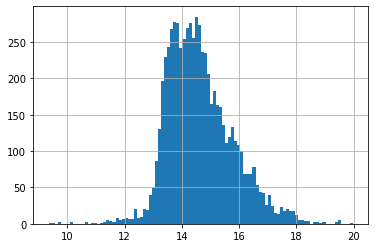

In [68]:
data['logX'].hist(bins=100)

# Cleaned dataset

In [69]:
data

DataYear        BuildingType PrimaryPropertyType  CouncilDistrictCode  \
0         2015      NonResidential               Hotel                    7   
1         2015      NonResidential               Hotel                    7   
2         2015      NonResidential               Hotel                    7   
3         2015      NonResidential               Hotel                    7   
4         2015      NonResidential               Hotel                    7   
...        ...                 ...                 ...                  ...   
6711      2016  Nonresidential COS              Office                    2   
6712      2016  Nonresidential COS               Other                    2   
6713      2016  Nonresidential COS               Other                    7   
6714      2016  Nonresidential COS  Mixed Use Property                    1   
6715      2016  Nonresidential COS  Mixed Use Property                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                  DOWNTOWN       1927                1.0            12.0   
1                  DOWNTOWN       1996                1.0            11.0   
2                  DOWNTOWN       1969                1.0            41.0   
3                  DOWNTOWN       1926                1.0            10.0   
4                  DOWNTOWN       1980                1.0            18.0   
...                     ...        ...                ...             ...   
6711       GREATER DUWAMISH       1990                1.0             1.0   
6712               DOWNTOWN       2004                1.0             1.0   
6713  MAGNOLIA / QUEEN ANNE       1974                1.0             1.0   
6714       GREATER DUWAMISH       1989                1.0             1.0   
6715       GREATER DUWAMISH       1938                1.0             1.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               961990                   0                  961990   
3                61320                   0                   61320   
4               119890               12460                  107430   
...                ...                 ...                     ...   
6711             12294                   0                   12294   
6712             16000                   0                   16000   
6713             13157                   0                   13157   
6714             14101                   0                   14101   
6715             18258                   0                   18258   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                     Hotel                    88434.0   
1                     Hotel                    83880.0   
2                     Hotel                   757243.0   
3                     Hotel                    61320.0   
4                     Hotel                   123445.0   
...                     ...                        ...   
6711                 Office                    12294.0   
6712     Other - Recreation                    16000.0   
6713     Other - Recreation                     7583.0   
6714     Other - Recreation                     6601.0   
6715     Other - Recreation                     8271.0   

        SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                             No Use                              0.0   
1                            Parking                          15064.0   
2                            Parking                         100000.0   
3                             No Use                              0.0   
4                            Parking                          68009.0   
...                              ...                              ...   
6711                          No Use                              0.0   
6712      

# Prepare training and test sets

- target labels (NRJ consumption)

In [70]:
y = data.logX

In [71]:
y.isna().sum()

0

- data features to reveal patterns

In [72]:
# Drop additional columns not relevant for prediction task
x=data.drop(['DataYear', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'Outlier', 'TotalGHGEmissions', 'logX'], axis='columns')

In [73]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6655 entries, 0 to 6715
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     6655 non-null   object 
 1   PrimaryPropertyType              6655 non-null   object 
 2   CouncilDistrictCode              6655 non-null   int64  
 3   Neighborhood                     6655 non-null   object 
 4   YearBuilt                        6655 non-null   int64  
 5   NumberofBuildings                6655 non-null   float64
 6   NumberofFloors                   6655 non-null   float64
 7   PropertyGFATotal                 6655 non-null   int64  
 8   PropertyGFAParking               6655 non-null   int64  
 9   PropertyGFABuilding(s)           6655 non-null   int64  
 10  LargestPropertyUseType           6655 non-null   object 
 11  LargestPropertyUseTypeGFA        6655 non-null   float64
 12  SecondLargestPropert

### Transform categorical variables into one-hot vectors

In [74]:
to_categorical = x.select_dtypes(['object']).keys()
list(to_categorical)

['BuildingType',
 'PrimaryPropertyType',
 'Neighborhood',
 'LargestPropertyUseType',
 'SecondLargestPropertyUseType',
 'ThirdLargestPropertyUseType',
 'ComplianceStatus']

In [75]:
x= pd.get_dummies(data=x, columns=list(to_categorical))

In [76]:
x.shape

(6655, 223)

In [77]:
x.head()

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
0                    7       1927                1.0            12.0   
1                    7       1996                1.0            11.0   
2                    7       1969                1.0            41.0   
3                    7       1926                1.0            10.0   
4                    7       1980                1.0            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

   LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                    88434.0                              0.0   
1                    83880.0                          15064.0   
2                   757243.0                         100000.0   
3                    61320.0                              0.0   
4                   123445.0                          68009.0   

   ThirdLargestPropertyUseTypeGFA   Latitude   Longitude  BuildingType_Campus  \
0                             0.0  47.612190 -122.337997                    0   
1                          4622.0  47.613106 -122.333358                    0   
2                             0.0  47.613349 -122.337699                    0   
3                             0.0  47.614216 -122.336609                    0   
4                             0.0  47.613754 -122.340924                    0   

   BuildingType_Multifamily HR (10+)  BuildingType_Multifamily LR (1-4)  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   BuildingType_Multifamily MR (5-9)  BuildingType_NonResidential  \
0                                  0                            1   
1                                  0                            1   
2                                  0                            1   
3                                  0                            1   
4                                  0                            1   

   BuildingType_Nonresidential COS  BuildingType_Nonresidential WA  \
0                                0                               0   
1                                0                               0   
2                                0                               0   
3                                0                               0   
4                                0                               0   

   BuildingType_SPS-District K-12  PrimaryPropertyType_College/University  \
0                               0                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       0   
4                               0                                       0   

   PrimaryPropertyType_Distribution Center  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   PrimaryPropertyType_Distribution Center\n  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                     

### Prepare training and test sets

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
scaler = StandardScaler(copy=False)

In [79]:
# set aside 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [80]:
x_train.shape

(5324, 223)

In [81]:
# Normalize numerical features using sklearn scaler
numeric_columns = x_train.select_dtypes(['float64', 'int64']).columns
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns],y_train)

C:\Users\lveys\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lveys\anaconda3\envs\torch\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [82]:
# use training set parameters to normalize test set. Model should not have any info about test set
numeric_columns = x_test.select_dtypes(['float64', 'int64']).columns
x_test[numeric_columns] = scaler.transform(x_test[numeric_columns])

C:\Users\lveys\anaconda3\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lveys\anaconda3\envs\torch\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


### Normalized train set

In [83]:
x_train

CouncilDistrictCode  YearBuilt  NumberofBuildings  NumberofFloors  \
1168            -0.679821  -1.299557           -0.08177        0.063778   
5707            -0.679821  -1.843255           -0.08177       -0.482422   
4641             1.209694  -1.692228           -0.08177       -0.482422   
1057            -1.152200  -0.212159           -0.08177       -0.664489   
734              1.209694   0.663800           -0.08177        0.063778   
...                   ...        ...                ...             ...   
4978             0.264937  -0.000721           -0.08177       -0.118289   
3286            -0.679821   1.388732           -0.08177        0.427911   
1669            -0.207442  -1.208940           -0.08177       -0.300355   
2628            -0.679821  -1.631817           -0.08177       -0.118289   
2753            -1.152200  -1.299557           -0.08177       -0.118289   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1168         -0.254488           -0.275985               -0.217611   
5707         -0.469973           -0.275985               -0.463453   
4641         -0.438587           -0.275985               -0.427646   
1057         -0.353262           -0.275985               -0.330300   
734          -0.346199           -0.275985               -0.322243   
...                ...                 ...                     ...   
4978          0.925618           -0.275985                1.128743   
3286          0.046153           -0.275985                0.125383   
1669         -0.472352           -0.275985               -0.466167   
2628         -0.453036           -0.275985               -0.444131   
2753         -0.386966           -0.275985               -0.368753   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
1168                  -0.236194                        -0.354750   
5707                  -0.455023                        -0.312858   
4641                  -0.472072                        -0.182518   
1057                  -0.435735                        -0.060622   
734                   -0.292791                        -0.354750   
...                         ...                              ...   
4978                   1.313508                        -0.354750   
3286                  -0.108640                        -0.049472   
1669                  -0.445347                        -0.354750   
2628                  -0.421988                        -0.354750   
2753                  -0.422389                        -0.189514   

      ThirdLargestPropertyUseTypeGFA  Latitude  Longitude  \
1168                       -0.188503 -0.276238   0.291265   
5707                       -0.188503  0.018323   1.027224   
4641                        0.000346 -0.315039  -0.210384   
1057                        0.373015 -1.151108  -0.014231   
734                        -0.188503 -0.196286  -0.550730   
...                              ...       ...        ...   
4978                       -0.188503  1.698899   0.045113   
3286                        0.342122 -0.184557   0.626753   
1669                       -0.188503  0.323939   0.271272   
2628                       -0.188503 -0.039619   0.538594   
2753                       -0.188503 -0.532436   0.298228   

      BuildingType_Campus  BuildingType_Multifamily HR (10+)  \
1168                    0                                  0   
5707                    0                                  0   
4641                    1                                  0   
1057                    0                                  0   
734                     0                                  0   
...                   ...                                ...   
4978                    0                                  0   
3286                    0                                  0   
1669                    0                                  0   
2628                    0                                  0   
2753      

# Train model

In [84]:
parameters = {
    'n_estimators' : [10,50,100,300,500,700], #nombre d'arbres de décision
    'min_samples_leaf' : [1,3,5,10], #nombre de feuilles minimales dans un noeud
    'max_features': ['auto', 'sqrt'] #nombre de features observées pour chaque arbre
}

RandomForestmodel_search = GridSearchCV(RandomForestRegressor(n_jobs=-1, random_state=0),
                               param_grid = parameters,
                              verbose=2,
                               cv=5)

RandomForestmodel_search.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   1.8s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   1.0s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   0.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   0.6s
[CV] max_features=auto, min_samples_leaf=1, n_estimators=50 ..........
[CV]  max_features=auto, min_samples_leaf=1, n_estimators=50, total=   0.7s
[CV] max_features=auto, min_samples_leaf=1

[CV]  max_features=auto, min_samples_leaf=3, n_estimators=700, total=   4.1s
[CV] max_features=auto, min_samples_leaf=3, n_estimators=700 .........
[CV]  max_features=auto, min_samples_leaf=3, n_estimators=700, total=   4.3s
[CV] max_features=auto, min_samples_leaf=3, n_estimators=700 .........
[CV]  max_features=auto, min_samples_leaf=3, n_estimators=700, total=   4.1s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_leaf=5, n_estimators=10 ..........
[CV]  max_features=auto, min_samples_leaf=5, n_estimators=10, total=   0.3s
[CV] max_features=auto, min_samples_lea

[CV]  max_features=auto, min_samples_leaf=10, n_estimators=500, total=   2.4s
[CV] max_features=auto, min_samples_leaf=10, n_estimators=500 ........
[CV]  max_features=auto, min_samples_leaf=10, n_estimators=500, total=   2.5s
[CV] max_features=auto, min_samples_leaf=10, n_estimators=700 ........
[CV]  max_features=auto, min_samples_leaf=10, n_estimators=700, total=   3.3s
[CV] max_features=auto, min_samples_leaf=10, n_estimators=700 ........
[CV]  max_features=auto, min_samples_leaf=10, n_estimators=700, total=   3.4s
[CV] max_features=auto, min_samples_leaf=10, n_estimators=700 ........
[CV]  max_features=auto, min_samples_leaf=10, n_estimators=700, total=   3.4s
[CV] max_features=auto, min_samples_leaf=10, n_estimators=700 ........
[CV]  max_features=auto, min_samples_leaf=10, n_estimators=700, total=   3.2s
[CV] max_features=auto, min_samples_leaf=10, n_estimators=700 ........
[CV]  max_features=auto, min_samples_leaf=10, n_estimators=700, total=   3.3s
[CV] max_features=sqrt, min_

[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=300, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=500, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=500, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=500, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=500, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=500 .........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=500, total=   0.9s
[CV] max_features=sqrt, min_samples_leaf=3, n_estimators=700 .........
[CV]  max_features=sqrt, min_samples_leaf=3, n_estimators=700, total=   1.1s
[CV] max_features=sqrt, min_samples

[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=300, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=300 ........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=300, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=300 ........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=300, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=300 ........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=300, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=300 ........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=300, total=   0.6s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=500 ........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=500, total=   0.8s
[CV] max_features=sqrt, min_samples_leaf=10, n_estimators=500 ........
[CV]  max_features=sqrt, min_samples_leaf=10, n_estimators=500, total=   0.8s
[CV] max_features=sqrt, min_

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  5.0min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500, 700]},
             verbose=2)

In [85]:
RandomForestmodel_search.best_params_

{'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 300}

In [86]:
from sklearn.metrics import mean_squared_error

In [87]:
preds= RandomForestmodel_search.predict(x_test)
print(f'Square Root of Mean Squared Error: {math.sqrt(mean_squared_error(y_test,preds))}')

Square Root of Mean Squared Error: 0.4050452478672011


#### Evaluate performance

In [88]:
def evaluate(model, test_data, test_targets):
    predictions = model.predict(test_data)
    errors = abs(predictions - test_targets)
    mae = 100 * np.mean(errors / test_targets)
    accuracy = 100 - mae
    print('Model Performance')
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [89]:
best_random = RandomForestmodel_search.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model Performance
Average Error: 0.2523
Accuracy = 98.27%.


# Observe features with highest importance

In [90]:
# function for creating a feature importance dataframe
def feature_importance(column_names, importances):
    df = pd.DataFrame({'feature': column_names,'feature_importance': importances}).sort_values('feature_importance', ascending = False).reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def feature_importance_plot(feature_importance_df, title):
    feature_importance_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = feature_importance_df.head(8), orient = 'h', color = 'royalblue').set_title(title, fontsize = 20)

In [91]:
base_importance = feature_importance(x_train.columns, best_random.feature_importances_)
base_importance

feature  \
0                                                                     PropertyGFATotal   
1                                                               PropertyGFABuilding(s)   
2                                                            LargestPropertyUseTypeGFA   
3                                                      SecondLargestPropertyUseTypeGFA   
4                                                                       NumberofFloors   
5                                                                            YearBuilt   
6                                                                   PropertyGFAParking   
7                                                                             Latitude   
8                                                                            Longitude   
9                                             PrimaryPropertyType_Low-Rise Multifamily   
10                                                   BuildingType_Multifamily LR (1-4)   
11                                                      ThirdLargestPropertyUseTypeGFA   
12                                          LargestPropertyUseType_Multifamily Housing   
13                                                    PrimaryPropertyType_Large Office   
14                                                                 CouncilDistrictCode   
15                                    LargestPropertyUseType_Supermarket/Grocery Store   
16                                                         BuildingType_NonResidential   
17                                   LargestPropertyUseType_Non-Refrigerated Warehouse   
18                                                               Neighborhood_DOWNTOWN   
19                                                  ThirdLargestPropertyUseType_No Use   
20                                                 SecondLargestPropertyUseType_No Use   
21                                                      ComplianceStatus_Non-Compliant   
22                                                           PrimaryPropertyType_Other   
23                                                        PrimaryPropertyType_Hospital   
24                                                SecondLargestPropertyUseType_Parking   
25                                                       LargestPropertyUseType_Office   
26                                     PrimaryPropertyType_Supermarket / Grocery Store   
27                                            PrimaryPropertyType_Mid-Rise Multifamily   
28                                                       Neighborhood_GREATER DUWAMISH   
29                                       PrimaryPropertyType_Supermarket/Grocery Store   
30                                        LargestPropertyUseType_Self-Storage Facility   
31                        LargestPropertyUseType_Hospital (General Medical & Surgical)   
32                                                   BuildingType_Multifamily MR (5-9)   
33                                      PrimaryPropertyType_Non-Refrigerated Warehouse   
34                                                                   NumberofBuildings   
35                                                          ComplianceStatus_Compliant   
36                                                   BuildingType_Multifamily HR (10+)   
37                                                        LargestPropertyUseType_Other   
38                                                       PrimaryPropertyType_Warehouse   
39                                                                   Neighborhood_EAST   
40                                                                 BuildingType_Campus   
41                                           PrimaryPropertyType_High-Rise Multifamily   
42                                                  Neighborhood_MAGNOLIA / QUEEN ANNE   
43                                                   LargestPropertyUseType_Laboratory   
44                           

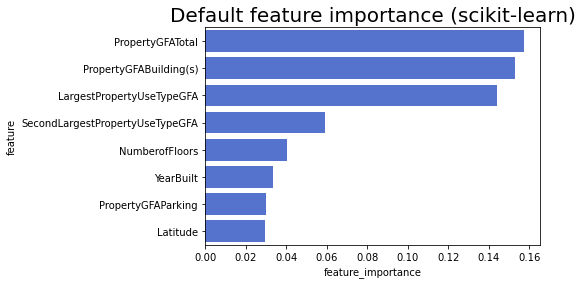

In [92]:
feature_importance_plot(base_importance, 'Default feature importance (scikit-learn)')

- After normalization, the most important features are those related to the Ground Floor Area which is a measure of the available surface
- These measures are likely correlated to the total surface variable (Property Total GFA). Overall these metrics explain circa 50%
- Next important feature is the number of floors, also related to the total surface.
- The Year Build is next and we can think about the relationship to insulation performance

In [93]:
coefficients = abs(RandomForestmodel_search.best_estimator_.feature_importances_)
df_coefficients = pd.concat((pd.DataFrame(x_train.columns, columns = ['Variable']), pd.DataFrame(coefficients, columns = ['Coefficient'])), axis = 1).sort_values(by='Coefficient', ascending = False)

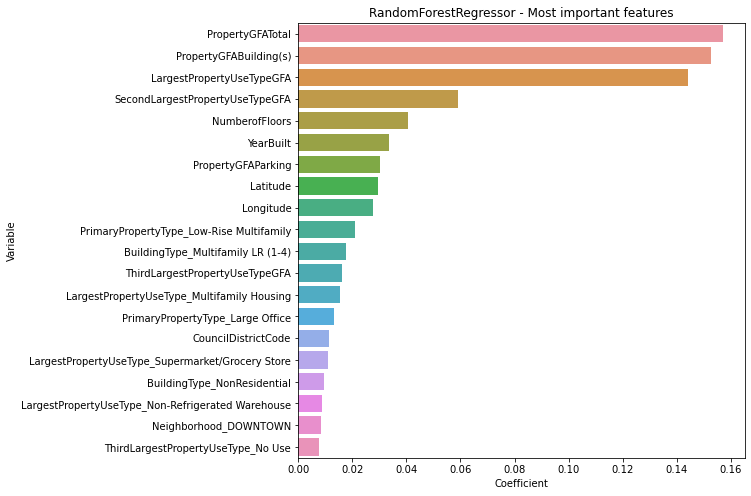

In [94]:
plt.figure(figsize=(8,8))
plt.title('RandomForestRegressor - Most important features')
sns.barplot(y = df_coefficients['Variable'].head(20), x = df_coefficients['Coefficient'].head(20))
plt.show()

# Train with XGBOOST
- for reference : https://www.datacamp.com/community/tutorials/xgboost-in-python#apply

In [95]:
import xgboost as xgb
from xgboost import XGBRegressor

In [96]:
parameters = {'n_estimators' : [100,500,1000,2000] }
xgb_grid = GridSearchCV(XGBRegressor(n_jobs=-1), param_grid = parameters, cv = 5, verbose=5)
xgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=100 ................................................
[22:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=100, score=0.756, total=   0.3s
[CV] n_estimators=100 ................................................
[22:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.791, total=   0.3s
[CV] n_estimators=100 ................................................
[22:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.784, total=   0.3s
[CV] n_estimators=100 ................................................
[22:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.778, total=   0.3s
[CV] n_estimators=100 ................................................
[22:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


[CV] .................... n_estimators=100, score=0.759, total=   0.3s
[CV] n_estimators=500 ................................................
[22:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.797, total=   1.3s
[CV] n_estimators=500 ................................................
[22:41:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.828, total=   1.3s
[CV] n_estimators=500 ................................................
[22:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=500, score=0.815, total=   1.4s
[CV] n_estimators=500 ................................................
[22:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecate

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   46.4s finished


GridSearchCV(cv=5, estimator=XGBRegressor(n_jobs=-1),
             param_grid={'n_estimators': [100, 500, 1000, 2000]}, verbose=5)

In [97]:
xgb_grid.best_params_

{'n_estimators': 2000}

In [98]:
xgb_grid.best_estimator_

XGBRegressor(n_estimators=2000, n_jobs=-1)

<Figure size 2160x1800 with 0 Axes>

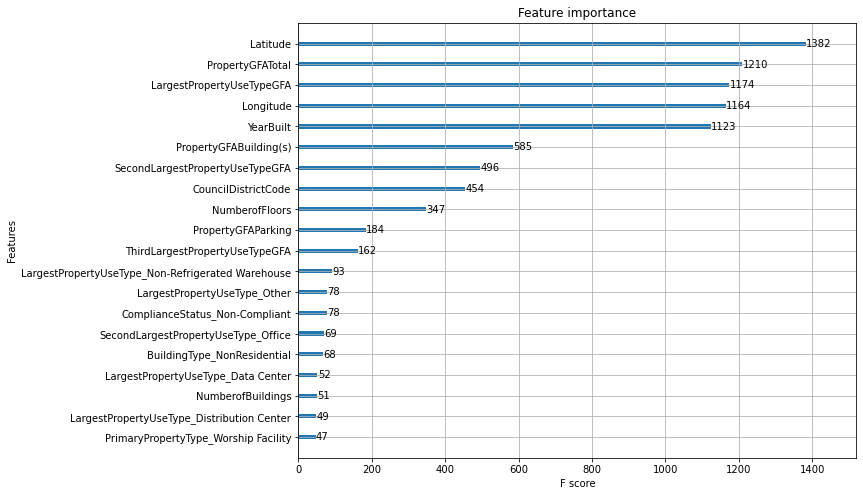

In [112]:
plt.rcParams['figure.figsize'] = [10, 8]
xgb.plot_importance(xgb_grid.best_estimator_,max_num_features=20)
plt.show()

In [107]:
random_accuracy = evaluate(xgb_grid, x_test, y_test)

Model Performance
Average Error: 0.2970
Accuracy = 97.95%.


In [106]:
math.sqrt(mean_squared_error(xgb_grid.predict(x_test), y_test))

0.4325785277637787

### XGBoost decision tree
- https://machinelearningmastery.com/visualize-gradient-boosting-decision-trees-xgboost-python/

[00:30:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ExecutableNotFound: failed to execute ['dot.bat', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

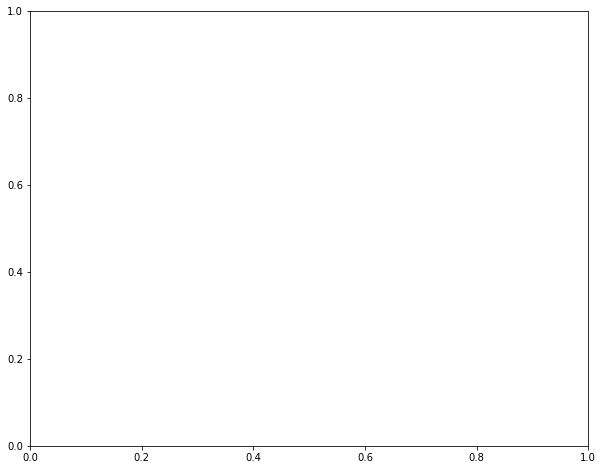

In [129]:
import graphviz
from xgboost import plot_tree


# fit model no training data
model = XGBRegressor()
model.fit(x_train, y_train, verbose=True)

xgb.plot_tree(model, num_trees=0)


# plot single tree
#plot_tree(model)
plt.show()

In [119]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)